<a href="https://colab.research.google.com/github/amot2017/blank-app/blob/main/Copy_of_Clustering_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


In [ ]:
Filename=('retail_sales_dataset.csv')
df=pd.read_csv(Filename)
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns]

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
0,1,34,3,50,150
1,2,26,2,500,1000
2,3,50,1,30,30
3,4,37,1,500,500
4,5,30,2,50,100
...,...,...,...,...,...
995,996,62,1,50,50
996,997,52,3,30,90
997,998,23,4,25,100
998,999,36,3,50,150


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])
inertia=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,random_state=35, n_init=10)
  kmeans.fit(scaled_data)
  inertia.append(kmeans.inertia_)

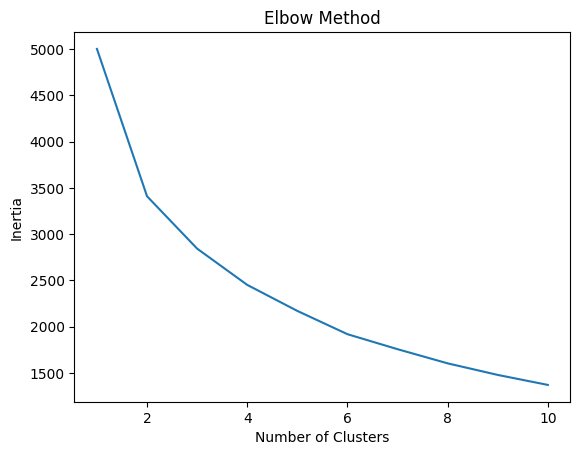

In [ ]:
plt.plot(range(1,11),inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
kmeans=KMeans(n_clusters=2,random_state=35, n_init=10)
df['cluster']=kmeans.fit_predict(scaled_data)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,cluster
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,1
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,1


In [ ]:
df.groupby('cluster')[["Total Amount", 'Quantity', 'Price per Unit', 'Age']].mean()

,Total Amount,Quantity,Price per Unit,Age
cluster,,,,
0,1111.714286,2.762857,413.714286,40.520000
1,102.923077,2.380000,53.984615,41.861538


In [ ]:
Intrepratation
From the raw transactions, we computed:

Purchase Frequency = number of purchases
Total Spend = total amount spent
Total =Quantity Purchased
Average Spend per Purchase
Included Age and encoded Gender
These features reflect both demographics and shopping behavior
I used the K-Means clustering algorithm:
Standardized all numeric features
Used the Elbow Method to find the optimal number of clusters


#clusters selected

Applied K-Means and assigned each customer to a segment
Cluster	Avg Age	Total Spend	Avg Spend/Purchase	Interpretation
Cluster 1	 Are older and an average age 42	Low Spenders and Price-sensitive or infrequent shoppers
Cluster 2	 are quite younger an average of 40	High Spenders High, High-value or loyal customers
Segment	Strategy
Cluster 2 For cluster 2 bUsiness should Offer loyalty programs, exclusive promotions, and premium product access. These are valuable customers.
Cluster 1 are low Spenders	Use SMS discounts, product bundles, or first-time buyer deals to boost their spending and engagement.


After running the above cell, you will be prompted to authenticate your Google Drive account. Once mounted, you can access your files from `/content/drive/My Drive/`.